MOUNTING DRIVE



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
#making the minor project
import os
if not os.path.isdir("minorproject"):
  os.makedirs("minorproject")

In [ ]:
%cd minorproject
print("Now the path is:")
os.getcwd()

/content/gdrive/MyDrive/minorproject
Now the path is:


'/content/gdrive/MyDrive/minorproject'

IMPORTING THE MODULES

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


CLONING ULTRALYTICS (YOLO V8)

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 7.5 MB/s eta 0:00:00


TRAINING THE MODEL FOR 50 EPOCHS


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data='/content/gdrive/MyDrive/minorproject/data.yaml'  epochs=50 imgsz=640

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 5, in <module>
    from ultralytics.cfg import entrypoint
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.hub import start
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/hub/__init__.py", line 5, in <module>
    from ultralytics.data.utils import HUBDatasetStats
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 18, in <module>
    from ultralytics.utils import DEFAULT_CFG, LOCAL_RANK, LOGGER, NUM_THREADS, TQDM_BAR_FORMAT
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/__init__.py", line 829, in <module>
    if Path(inspect.stack()[0].filename).parent.parent.as_posix() in inspect.stack()[-1].filename:
  File "/usr/lib/python3.10/inspect.py", line 1673, in stack


PREDICTING

In [ ]:
!yolo predict model='/content/gdrive/MyDrive/minorproject/runs/detect/train2/weights/best.pt' source='/content/gdrive/MyDrive/minorproject/TSFS.jpg'  conf = 0.5 iou=0.7

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients

image 1/1 /content/gdrive/MyDrive/minorproject/TSFS.jpg: 640x480 1 number plate, 77.8ms
Speed: 3.5ms preprocess, 77.8ms inference, 88.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict37


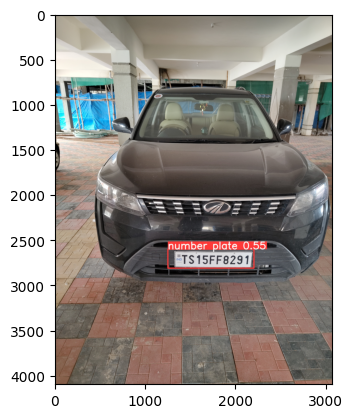

In [ ]:
#showing
predicted_image=cv2.imread('/content/gdrive/MyDrive/minorproject/runs/detect/predict37/TSFS.jpg')
plt.imshow(cv2.cvtColor(predicted_image,cv2.COLOR_BGR2RGB))

HERE WE GIVE THE PATH OF THE IMAGE

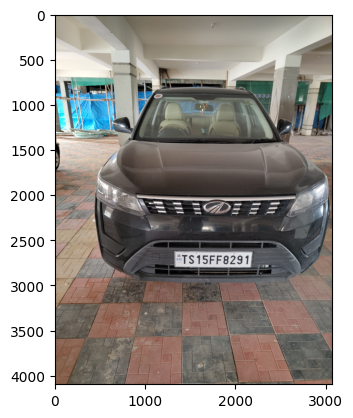

In [ ]:
image_path='/content/gdrive/MyDrive/minorproject/TSFS.jpg'
image_res=cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image_res,cv2.COLOR_BGR2RGB))

#  MODEL

In [ ]:
from ultralytics import YOLO

In [ ]:
model=YOLO('yolov8n.pt')
model=YOLO('/content/gdrive/MyDrive/minorproject/runs/detect/train2/weights/best.pt')

In [ ]:
results=model(image_path)


image 1/1 /content/gdrive/MyDrive/minorproject/TSFS.jpg: 640x480 1 number plate, 79.7ms
Speed: 3.6ms preprocess, 79.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


#METRICS

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.maps

Ultralytics YOLOv8.0.147 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
100%|██████████| 755k/755k [00:00<00:00, 37.5MB/s]
val: Scanning /content/gdrive/MyDrive/minorproject/labels/test.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
                   all         31         36      0.715      0.767      0.768      0.396
Speed: 0.2ms preprocess, 63.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val8


array([    0.39584])

#COORDINATES OF THE BOUNDING BOX OF NUMBER PLATE

In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'number plate'}
 orig_img: array([[[132, 149, 158],
         [134, 151, 160],
         [133, 150, 159],
         ...,
         [160, 171, 175],
         [158, 168, 175],
         [155, 165, 172]],
 
        [[134, 151, 160],
         [137, 154, 163],
         [136, 153, 162],
         ...,
         [163, 174, 178],
         [161, 171, 178],
         [159, 169, 176]],
 
        [[135, 152, 161],
         [138, 155, 164],
         [136, 153, 162],
         ...,
         [164, 175, 179],
         [162, 173, 177],
         [161, 172, 176]],
 
        ...,
 
        [[ 70,  91, 129],
         [ 73,  94, 132],
         [ 74,  95, 133],
         ...,
         [101, 119, 160],
         [101, 119, 160],
         [103, 121, 162]],
 
        [[ 67,  90, 128],
         [ 69,  92, 130],
         [ 71,  92, 130],
         ...,
      

In [ ]:
results[0].names[0]

'number plate'

In [ ]:
results[0].path

'/content/gdrive/MyDrive/minorproject/TSFS.jpg'

In [ ]:
boxes = results[0].boxes
l=len(boxes)
#for i in range(len(boxes)):
  #box = boxes[i]  # returns one box
  # print(box.cls)
box = boxes[0]
classs_number=box.cls
if(classs_number==0):
    # print(box.cls.item())
    # bounding_boxes_xyxy=box.xyxy
    # print(box.xyxy)
    # bounding_boxes_xyxy_np = bounding_boxes_xyxy.numpy()
    # print("dsgj")
  x_min, y_min, x_max, y_max = box.xyxy[0].tolist()
  #y_min=y_min+(0.25*(y_max-y_min))
  print("x_min=",x_min)
  print("y_min=",y_min)
  print("x_max=",x_max)
  print("y_max=",y_max)
    # print(bounding_boxes_xyxy_np)

x_min= 1247.289306640625
y_min= 2603.958984375
x_max= 2198.7177734375
y_max= 2813.385986328125


#REGION OF INTEREST (NUMBER PLATE REGION)

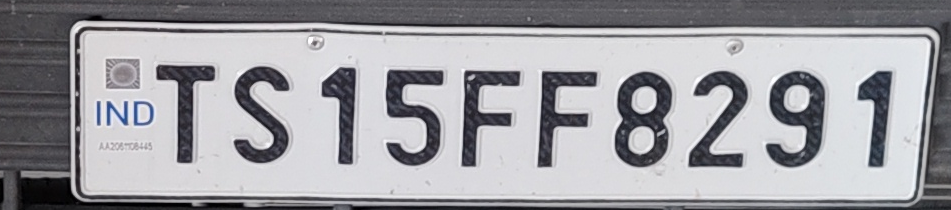

In [ ]:
roi = image_res[int(y_min):int(y_max), int(x_min):int(x_max)]
cv2_imshow(roi)

##GRAY SCALING

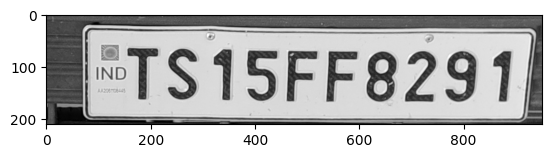

In [ ]:
gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

##GAUSSIAN BLUR

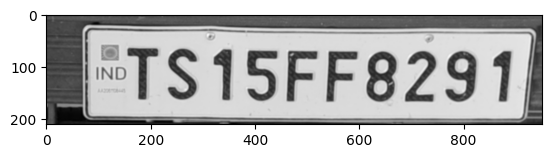

In [ ]:
blurred=cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(cv2.cvtColor(blurred,cv2.COLOR_BGR2RGB))

##EDGE DETECTION

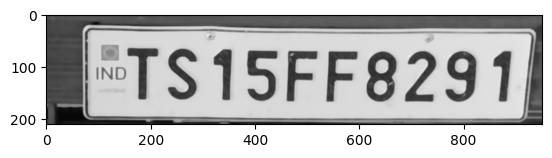

In [ ]:
bfilter = cv2.bilateralFilter(blurred,11,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(bfilter,cv2.COLOR_BGR2RGB))

#EASY OCR (CHARACTER RECOGNITION)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install easyocr

In [ ]:
import easyocr
import string

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

FORMATTING THE LICENSE NUMBER

In [ ]:
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5'}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}


In [ ]:
def license_complies_format(text):
    """
    Check if the license plate text complies with the required format.

    Args:
        text (str): License plate text.

    Returns:
        bool: True if the license plate complies with the format, False otherwise.
    """
    if len(text) != 10:
        return False

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[6] in dict_char_to_int.keys()) and \
       (text[7] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[7] in dict_char_to_int.keys()) and \
       (text[8] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[8] in dict_char_to_int.keys()) and \
       (text[9] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[9] in dict_char_to_int.keys()):
        return True
    else:
        return False

In [ ]:
def format_license(text):
    """
    Format the license plate text by converting characters using the mapping dictionaries.

    Args:
        text (str): License plate text.

    Returns:
        str: Formatted license plate text.
    """
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int, 6: dict_char_to_int, 7: dict_char_to_int, 8: dict_char_to_int, 9: dict_char_to_int}
    for j in range(10):
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_

READING THE LICENSE NUMBER

In [ ]:
test = reader.readtext(bfilter, paragraph=True)
sample = [x[1] for x in test]
sample

['IND', 'TSI5FF8291']

In [ ]:
if len(sample)>1:
    text=sample[1]
else:
    text=sample[0]

In [ ]:
if license_complies_format(text):
    result = format_license(text)
else:
    result=text
result

'TS15FF8291'

Validation

In [ ]:
from_rfid = ["HR26BC5514", "AP09CC6161", "TS15FF8291","AP16TB2079"]
if result.replace(" ",'') in from_rfid:
  print("Allow vehicle")
else:
  print("Do not allow vehicle")

Allow vehicle
